# Logistic regression

In [44]:
from taxipred.utils.constants import TAXI_FILLED_NA
import pandas as pd 
df = pd.read_csv(TAXI_FILLED_NA)

df.head(5)

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3,3.56,0.80,0.32,53.82,medium,0,0,1,0
1,36.87,1,2.70,1.21,0.15,37.27,high,1,1,0,0
2,30.33,4,3.48,0.51,0.15,116.81,medium,0,1,0,0
3,8.64,2,2.55,1.71,0.48,89.33,high,1,0,0,0
4,41.79,3,4.60,1.77,0.11,86.95,very high,1,0,0,1


In [45]:
df.isna()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False


In [46]:
y=df["Trip_Price"]
y.unique()

array(['medium', 'high', 'very high', 'sort of low', 'Extremey high',
       'Low'], dtype=object)

In [47]:
X = df.drop("Trip_Price", axis=1)
X.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3,3.56,0.80,0.32,53.82,0,0,1,0
1,36.87,1,2.70,1.21,0.15,37.27,1,1,0,0
2,30.33,4,3.48,0.51,0.15,116.81,0,1,0,0
3,8.64,2,2.55,1.71,0.48,89.33,1,0,0,0
4,41.79,3,4.60,1.77,0.11,86.95,1,0,0,1


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (469, 10)
X_test.shape = (231, 10)
y_train.shape = (469,)
y_test.shape = (231,)


In [49]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train)
scaled_X_train = scale.transform(X_train)
scaled_X_test = scale.transform(X_test)

scaled_X_test.shape, scaled_X_train.shape

((231, 10), (469, 10))

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

(array([[ 5.52938174e+00,  4.09454919e-01,  8.25766672e-02,
          3.03722690e+00,  1.64625593e+00,  1.91560072e+00,
         -8.47012798e-02, -1.89184023e-01, -1.48203211e-01,
         -1.96749670e-01],
        [-5.65385561e+00, -2.40636269e-01,  7.99484034e-03,
         -2.00906143e+00, -1.39529929e+00, -2.65455966e+00,
          5.99529733e-02,  2.06281381e-02,  1.39290681e-01,
          1.01180558e-01],
        [ 1.16381648e+00,  2.16254314e-03, -2.42714355e-02,
          1.49030163e-01,  3.83546399e-01,  5.65042584e-01,
         -8.77431183e-02, -5.62006809e-02, -1.82941804e-02,
         -4.79595470e-02],
        [-1.13581946e+00, -1.04921197e-01,  2.31042789e-02,
         -9.13952727e-01, -4.85950049e-01, -2.79188845e-01,
          1.39631842e-03,  9.54689502e-02, -4.58691531e-02,
          6.34133516e-02],
        [-3.68999142e+00, -1.08064445e-01, -9.34507996e-02,
         -1.72748040e+00, -1.32408695e+00, -1.15255284e+00,
          7.35411946e-02,  9.95191593e-02, -3.505324

LLM for the iloc

In [52]:
sampel = X_train.iloc[[0]].copy()
scaled_sampel = scale.transform(sampel)
model.predict_proba(scaled_sampel)


array([[3.16918514e-02, 1.75972122e-05, 4.13865559e-01, 1.25923969e-01,
        2.90363177e-03, 4.25597392e-01]])

In [53]:
y_pred_prob = model.predict_proba(scaled_X_test)
y_pred_prob[:10]

array([[3.17104815e-05, 7.78225474e-02, 1.25633160e-01, 5.71054172e-01,
        2.20033204e-01, 5.42520633e-03],
       [2.01248254e-02, 2.75998063e-05, 2.78768600e-01, 1.19953973e-01,
        3.89773513e-03, 5.77227266e-01],
       [2.95224529e-06, 1.89271332e-01, 4.01646317e-02, 4.03787497e-01,
        3.65590810e-01, 1.18277690e-03],
       [5.82947101e-05, 1.23008346e-02, 1.56428182e-01, 5.58907614e-01,
        2.52486315e-01, 1.98187602e-02],
       [3.96178637e-04, 9.34648338e-04, 2.17264770e-01, 5.71154419e-01,
        1.77754163e-01, 3.24958207e-02],
       [7.63382113e-04, 2.69835178e-03, 3.23377989e-01, 5.49566259e-01,
        8.63148699e-02, 3.72791481e-02],
       [1.64245547e-02, 1.96589627e-03, 4.60492319e-01, 3.22604649e-01,
        5.37659323e-02, 1.44746649e-01],
       [2.81073654e-07, 4.89113030e-01, 1.08262868e-02, 2.11681857e-01,
        2.88237684e-01, 1.40861297e-04],
       [5.39733382e-04, 4.36008531e-03, 2.58395528e-01, 5.82365789e-01,
        1.23378944e-01, 

accuray: 0.7186147186147186


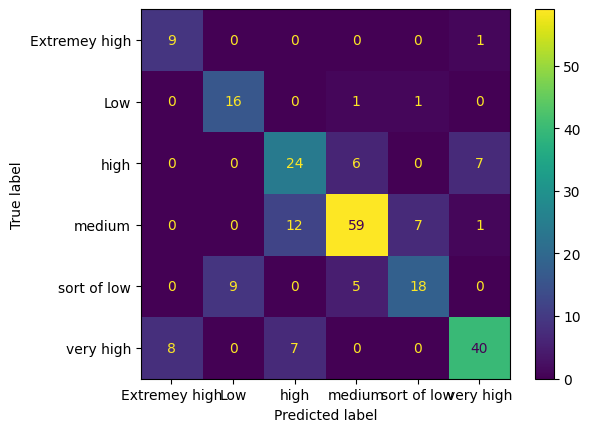

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_pred, y_test, labels=model.classes_)
display = ConfusionMatrixDisplay(con_mat, display_labels = model.classes_)
display.plot()
print(f"accuray: {accuracy}")